In [60]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Face')

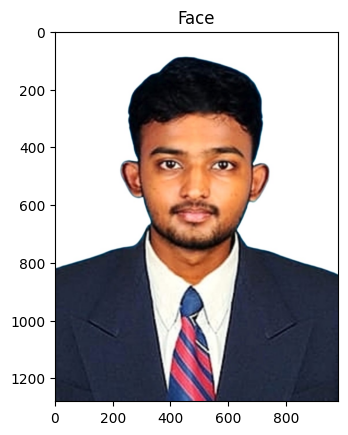

In [61]:
# Load the Face Image
faceImage = cv2.imread('log photo.jpg')
plt.imshow(faceImage[:,:,::-1]);plt.title("Face")

In [62]:
faceImage.shape

(1280, 981, 3)

In [63]:
#resized_faceImage.shape
faceImage.shape

(1280, 981, 3)

Text(0.5, 1.0, 'glasPNG')

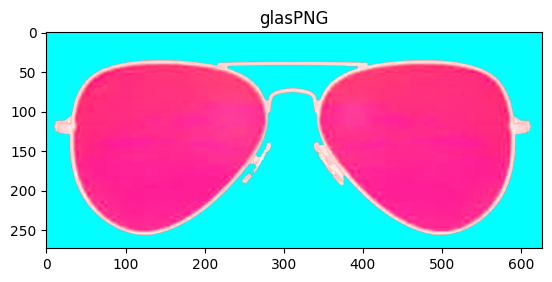

In [64]:
# Load the Sunglass image with Alpha channel
# (http://pluspng.com/sunglass-png-1104.html)
glassPNG = cv2.imread('sunglass.png',-1)
plt.imshow(glassPNG[:,:,::-1]);plt.title("glasPNG")

In [65]:
# Resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG,(300,150))
print("image Dimension ={}".format(glassPNG.shape))

image Dimension =(150, 300, 4)


In [66]:
# Separate the Color and alpha channels
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

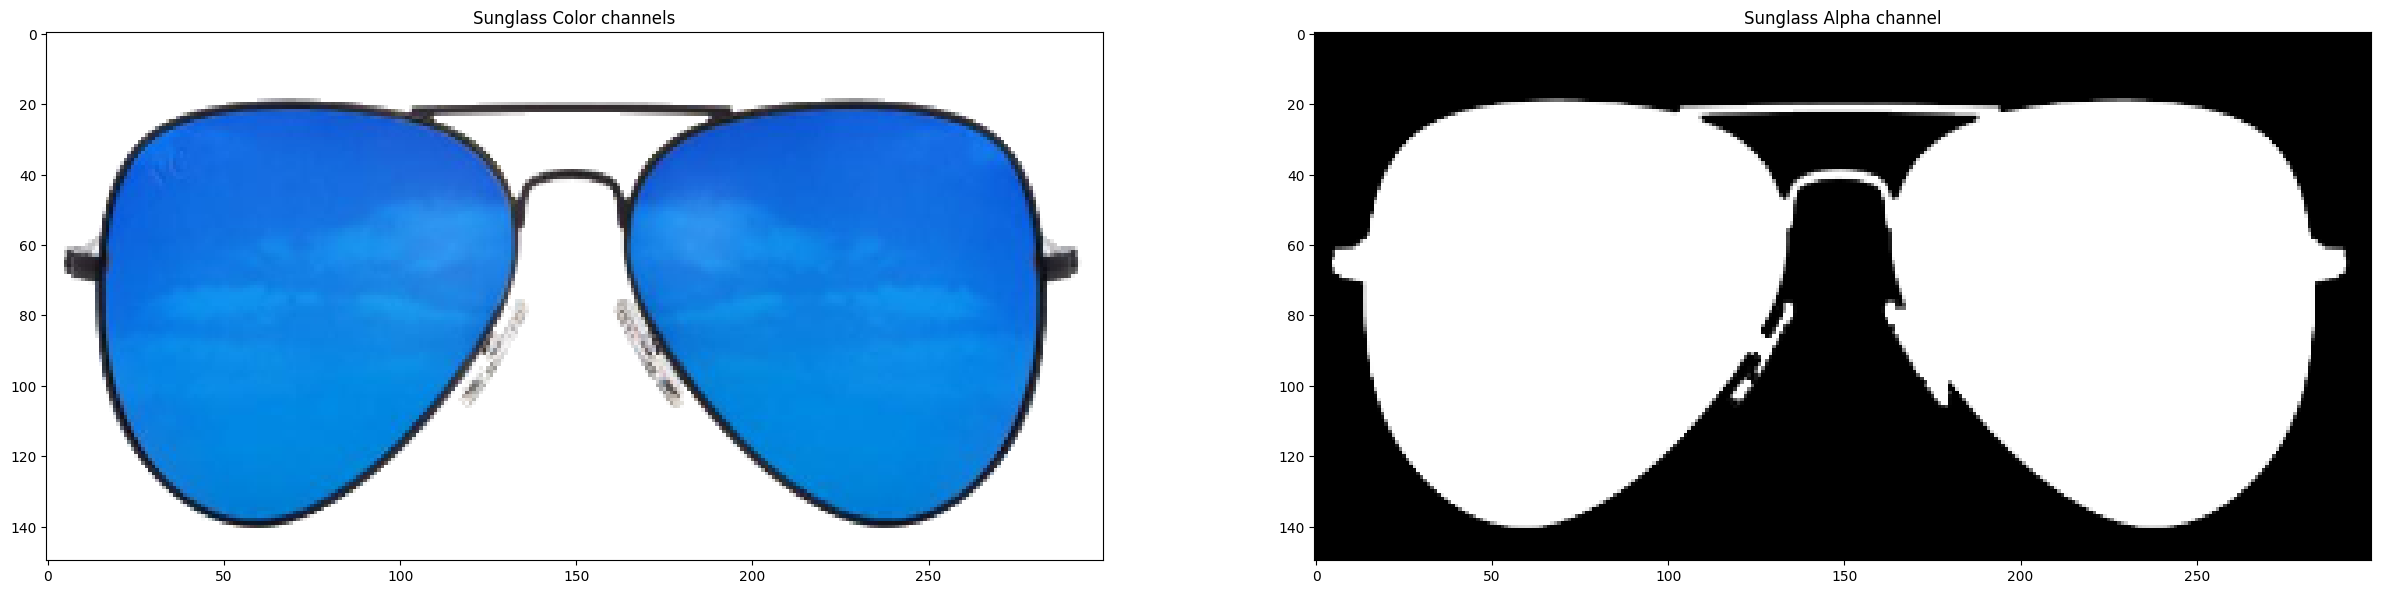

In [67]:
# Display the images for clarity
plt.figure(figsize=[30,30])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

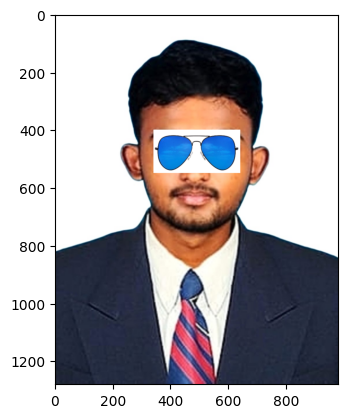

In [68]:
# Make a copy
#faceWithGlassesNaive = resized_faceImage.copy()
faceWithGlassesNaive = faceImage.copy()

# Move glasses up and slightly right
faceWithGlassesNaive[400:550,340:640] = glassBGR


plt.imshow(faceWithGlassesNaive[...,::-1])


Text(0.5, 1.0, 'Augmented Eye and Sunglass')

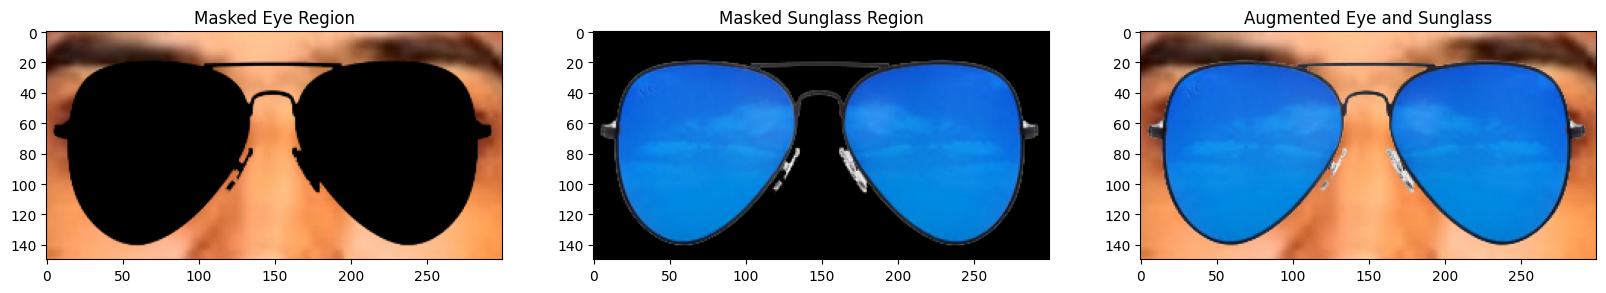

In [69]:
# Since Face Image is a 3-channel image, we create a 3 channel image for the mask
glassMask = cv2.merge((glassMask1, glassMask1, glassMask1))

# Make the values [0,1] since we are using arithmetic operations
glassMask = glassMask.astype(np.float32) / 255.0

# Make a copy
faceWithGlassesArithmetic = faceImage.copy()

# Get the eye region from the face image
eyeROI = faceWithGlassesArithmetic[400:550,340:640].astype(np.float32)

# Use the mask to create the masked eye region
maskedEye = cv2.multiply(eyeROI, (1 - glassMask))

# Use the mask to create the masked sunglass region
maskedGlass = cv2.multiply(glassBGR.astype(np.float32), glassMask)

# Combine the Sunglass in the Eye Region to get the augmented image
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)


# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131); plt.imshow(maskedEye[...,::-1].astype(np.uint8)); plt.title("Masked Eye Region")
plt.subplot(132); plt.imshow(maskedGlass[...,::-1].astype(np.uint8)); plt.title("Masked Sunglass Region")
plt.subplot(133); plt.imshow(eyeRoiFinal[...,::-1].astype(np.uint8)); plt.title("Augmented Eye and Sunglass")


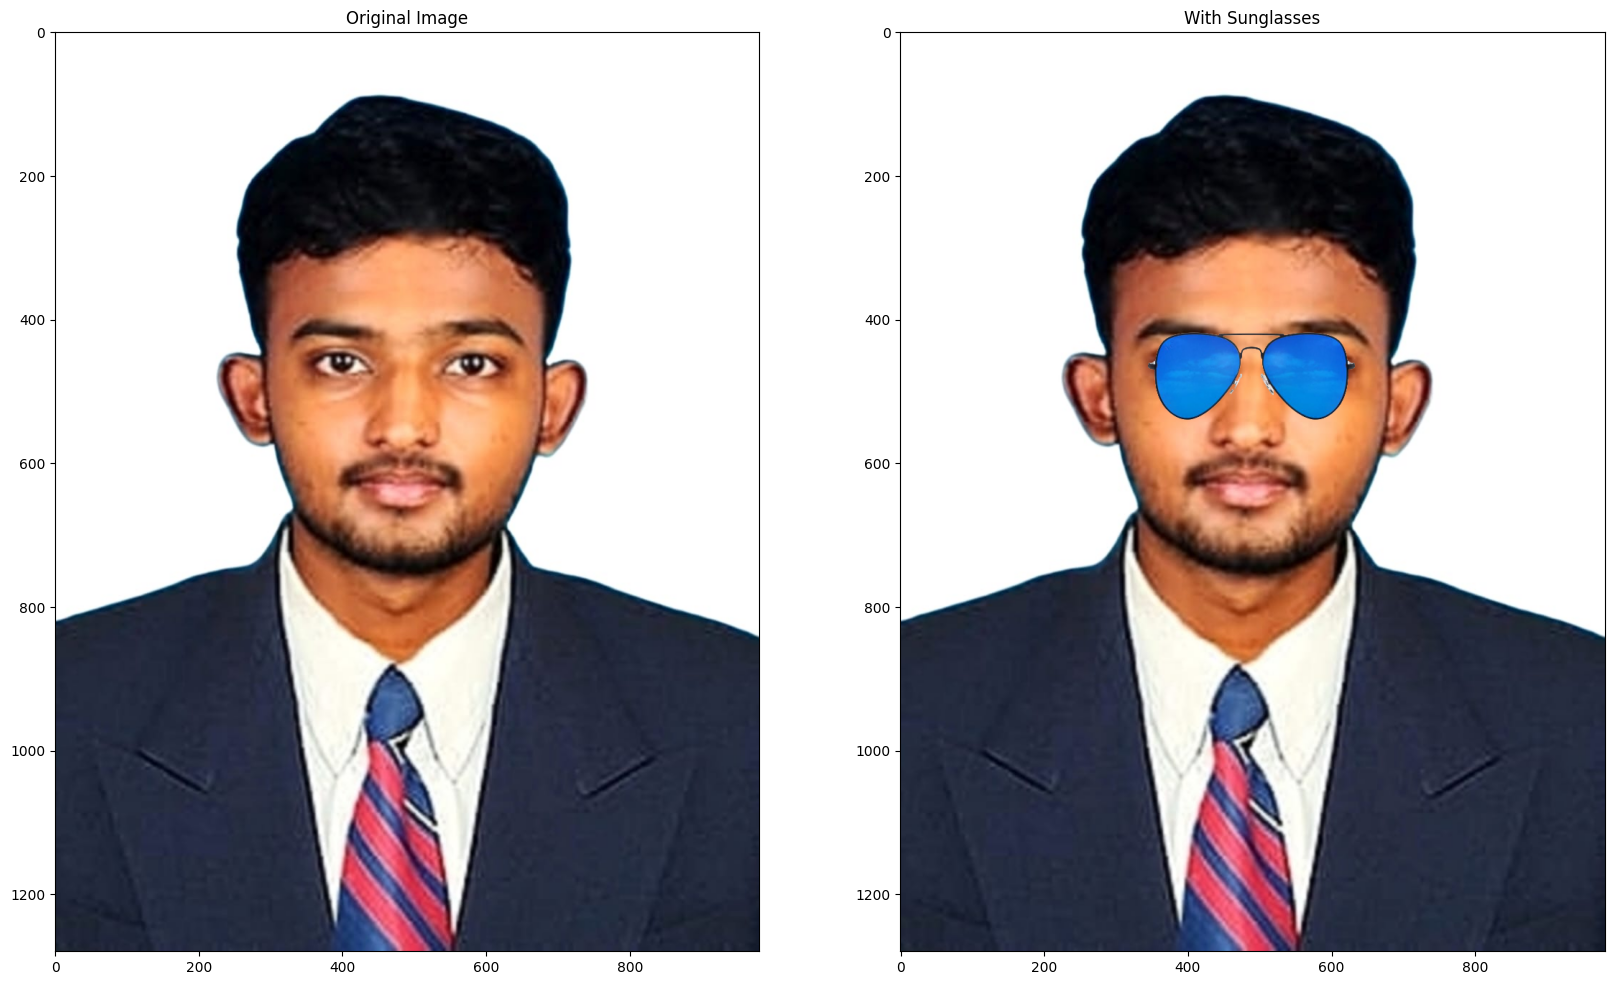

In [70]:
# Replace the eye ROI with the output from the previous section
faceWithGlassesArithmetic[400:550,340:640]=eyeRoiFinal

# Display the final result
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglasses");